**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

C:\Users\Omar\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Omar\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Omar\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


**Loading Data**

In [2]:
x_train = pd.read_csv('training_set_features.csv')
print(x_train.shape)
x_train.head()

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
y_train = pd.read_csv('training_set_labels.csv')
print(y_train.shape)
y_train.head()

(26707, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
y_train = y_train[['h1n1_vaccine','seasonal_vaccine']]
y_train.head()

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
test = pd.read_csv('test_set_features.csv')
print(test.shape)
test.head()

(26708, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
ss = pd.read_csv('submission_format.csv')
print(ss.shape)
ss.head()

(26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
respondent_id                  26707 non-null int64
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective  

In [8]:
x_train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

**Convert categorical variables into numeric**

In [9]:
cat_cols = ['education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa','employment_industry','employment_occupation']

from sklearn import preprocessing
def encode(train,test,cols):
    le = preprocessing.LabelEncoder()
    for x in cols:
        train[x] = le.fit_transform(train[x])
        test[x] = le.transform(test[x])

In [10]:
encode(x_train,test,cat_cols)

In [11]:
x_train.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [12]:
age_mapper = {"18 - 34 Years":1, "35 - 44 Years":2, "45 - 54 Years":3,"55 - 64 Years":4, "65+ Years":5 }
x_train['age_group'] = x_train['age_group'].replace(age_mapper)

In [13]:
age_mapper = {"18 - 34 Years":1, "35 - 44 Years":2, "45 - 54 Years":3,"55 - 64 Years":4, "65+ Years":5 }
test['age_group'] = test['age_group'].replace(age_mapper)

In [14]:
x_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,1,0,1,8,2,0.0,0.0,21,23
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,1,1,0,1,0,0.0,0.0,12,19
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,9,0,2.0,0.0,14,21
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,1,1,1,5,1,0.0,0.0,21,23
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,9,0,1.0,0.0,18,5


In [15]:
y_train.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [16]:
y_train.seasonal_vaccine.value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

**Remove NaN values**

In [17]:
x_train = x_train.fillna(0)
test = test.fillna(0)

**Remove any outliers**

In [18]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    
remove_outliers(x_train.iloc[:,1:])

In [19]:
x_train = x_train.iloc[:,1:]

**Split Data into training and validation**

In [20]:
x, x_test, y, y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

**Standard Scaling data values**

In [21]:
def sscale(train,val,test):
    sc = StandardScaler()
    train = sc.fit_transform(train)
    val = sc.transform(val)
    test = sc.transform(test.iloc[:,1:])
    
sscale(x,x_test,test)

**Our Model!**

In [22]:
model = Sequential()
model.add(Dense(32, input_dim=35, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

history = model.fit(x_train, y_train, epochs=50, batch_size=100,  verbose=1, validation_data=(x_test,y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 26707 samples, validate on 5342 samples
Epoch 1/50
26707/26707 [==============================] - 0s 18us/sample - loss: 0.6717 - auc: 0.6793 - val_loss: 0.5105 - val_auc: 0.7928
Epoch 2/50
26707/26707 [==============================] - 0s 12us/sample - loss: 0.4912 - auc: 0.8128 - val_loss: 0.4664 - val_auc: 0.8328
Epoch 3/50
26707/26707 [==============================] - 0s 13us/sample - loss: 0.4646 - auc: 0.8359 - val_loss: 0.4511 - val_auc: 0.8469
Epoch 4/50
26707/26707 [==============================] - 0s 12us/sample - loss: 0.4545 - auc: 0.8440 - val_loss: 0.4428 - val_auc: 0.8526
Epoch 5/50
26707/26707 [==============================] - 0s 12us/sample - loss: 0.4470 - auc: 0.8500 - val_loss: 0.4362 - val_auc: 0.8578
Epoch 6/50
26707/26707 [==============================] - 0s 12us/sample - loss: 

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


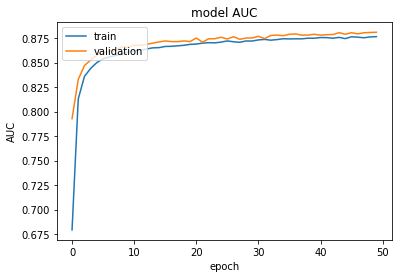

In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**This section aims to predict the competition test data to save my results**

In [25]:
predictions = model.predict(test.iloc[:,1:])
sub_file = ss.copy()
sub_file[['h1n1_vaccine','seasonal_vaccine']] = predictions
sub_file.to_csv('2.csv', index = False)

In [26]:
sub_file.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.105662,0.369321
1,26708,0.039201,0.089873
2,26709,0.221744,0.531563
3,26710,0.609337,0.914000
4,26711,0.434579,0.582210
